<h1 style="color: DarkBlue"> Regressão Linear </h1>

<h2 style=" color:black;"> Bibliotecas necessárias</h2>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<h2 style=" color:black;"> Importando os Dados e fazendo um ETL básico</h2>

In [11]:
#Importa os dados
df = pd.read_csv('rain_sydney.csv', sep=';')

<h2 style=" color:black;"> Conhecendo nossos dados</h2>

In [12]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062
Date,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Location,Sydney,Sydney,Sydney,Sydney,Sydney,Sydney,Sydney,Sydney,Sydney,Sydney,...,Sydney,Sydney,Sydney,Sydney,Sydney,Sydney,Sydney,Sydney,Sydney,Sydney
MinTemp,20.5,22.3,21,20.1,20.8,19.6,18.3,16.2,18.1,19,...,20.3,20.8,19.8,19.1,20.9,21.8,21.1,22.6,23.9,24.1
MaxTemp,27.1,36.5,26.2,27.5,26,32,21.6,22.3,23.2,25.7,...,24.3,24.4,27.2,27.4,29.3,29.6,28.9,36.6,33.3,30
Rainfall,0,0,0.2,0,0,0,0,5.8,0,0.4,...,0,0,0,1.6,0,0,0,0,0,0
Evaporation,7.4,8,5.6,7.4,8.2,9.4,11.4,7.6,3.8,6.6,...,9.2,7.6,9.4,4.6,11.2,11.2,7.8,10.4,9.2,8.2
Sunshine,5.9,3.5,5.6,11.2,12.2,12.8,1.7,0.4,2,9.3,...,3.7,7.9,4.3,12.8,10.9,6,9.4,4.8,0.5,4.8
RainToday,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [125]:
#Tamanho da Base
df.shape

(1092, 7)

In [188]:
#Informações sobre nosso DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 31566 to 32657
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1063 non-null   object 
 1   Location     1063 non-null   object 
 2   MinTemp      1063 non-null   float64
 3   MaxTemp      1063 non-null   float64
 4   Rainfall     1063 non-null   float64
 5   Evaporation  1063 non-null   float64
 6   Sunshine     1063 non-null   float64
 7   RainToday    1063 non-null   int32  
dtypes: float64(5), int32(1), object(2)
memory usage: 70.6+ KB


In [165]:
#Estatisticas Descritivas
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday
count,1092.000000,1092.000000,1089.000000,1074.000000,1084.000000,1092.000000
mean,15.151007,23.475458,3.324702,5.432961,7.277399,0.258242
std,4.545725,4.493658,10.272192,2.845692,3.770331,0.437868
min,5.000000,11.700000,0.000000,0.000000,0.000000,0.000000
25%,11.300000,20.200000,0.000000,3.200000,4.400000,0.000000
50%,15.400000,23.300000,0.000000,5.000000,8.300000,0.000000
75%,19.100000,26.500000,1.200000,7.400000,10.200000,1.000000
max,27.100000,40.900000,119.400000,15.800000,13.500000,1.000000


In [166]:
#Matriz de Correlação
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday
MinTemp,1.000000,0.769659,-0.003971,0.567551,-0.047805,0.009033
MaxTemp,0.769659,1.000000,-0.157272,0.501548,0.345708,-0.176216
Rainfall,-0.003971,-0.157272,1.000000,-0.079669,-0.299788,0.538540
Evaporation,0.567551,0.501548,-0.079669,1.000000,0.194740,-0.192163
Sunshine,-0.047805,0.345708,-0.299788,0.194740,1.000000,-0.344041
RainToday,0.009033,-0.176216,0.538540,-0.192163,-0.344041,1.000000


<h2 style=" color:blue;"> Box Plot: Como esta a distruibuição das horas de sol? </h2>

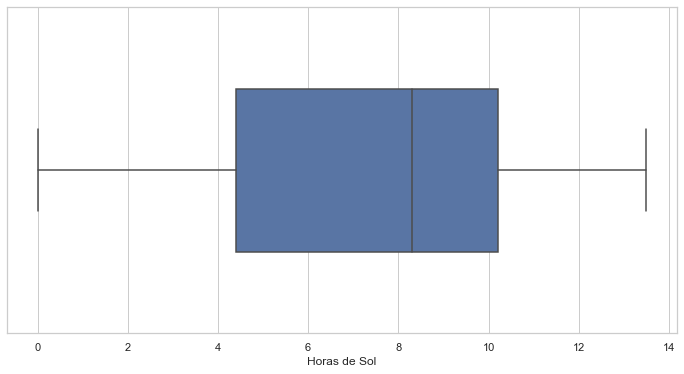

In [238]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Sunshine"], width=0.5 )
ax.figure.set_size_inches(12,6)
ax.set_xlabel("Horas de Sol")
ax

<h2 style=" color:blue;"> Pairplot: Como esta a distruibuição das variáveis perante as horas de sol? </h2>

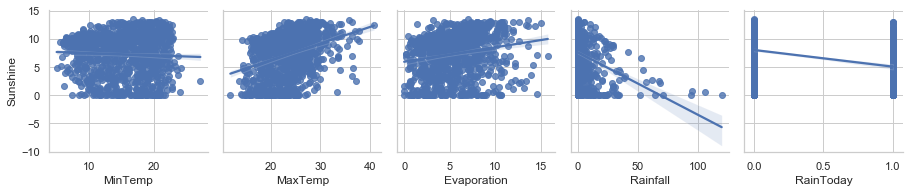

In [223]:
sns.set(style="whitegrid")
sns.pairplot(df, y_vars=['Sunshine'], x_vars=['MinTemp', 'MaxTemp', 'Evaporation', 'Rainfall', 'RainToday'] ,kind='reg')

<h2 style=" color:blue;"> Como está a curva de distruição dos nossos valores?</h2>

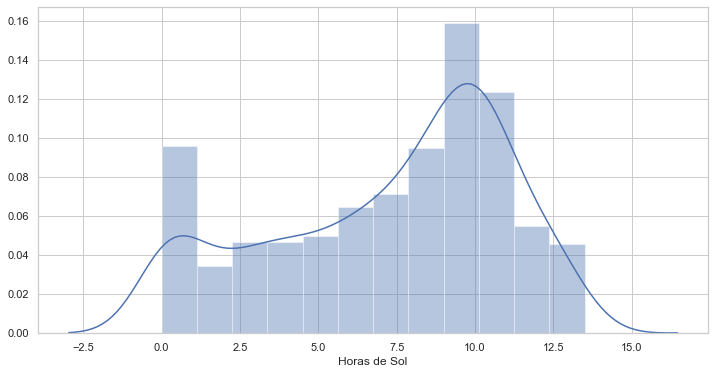

In [239]:
ax = sns.distplot(df['Sunshine'])
ax.figure.set_size_inches(12,6)
ax.set_xlabel("Horas de Sol")
ax

<h2 style=" color:blue;"> Horas de Sol x Temp. Máxima - Divide por dias que teve chuva ou não</h2>

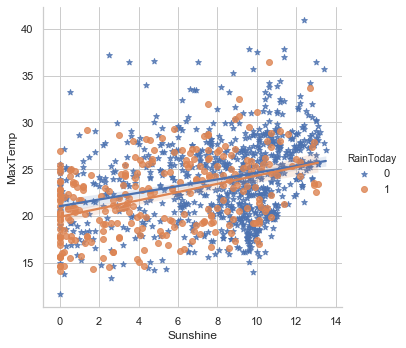

In [252]:
sns.lmplot(x="Sunshine", y="MaxTemp", data=df, markers=['*', 'o'], hue="RainToday")

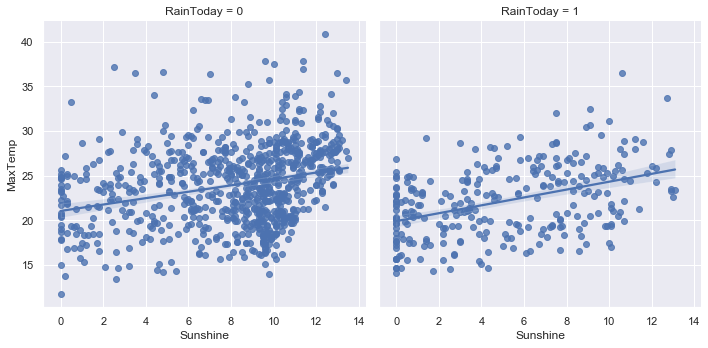

In [171]:
sns.lmplot(x="Sunshine", y="MaxTemp", data=df, col="RainToday")

<h2 style="color: red;">VAMOS COMEÇAR A DEFINIR NOSSOS VALORE PARA A REGRESSÃO LINEAR</h2>
<hr style="border: 1px solid red;">

<h2> O Queremos Responder: <p style="color: DarkGreen"> "Quantas horas de sol nós teremos com base na Temperatura Mínima, Temperatura Máxima, Chuva e Precipitação?" </p> </h2>

<h3> Fórmula da Regressão:  </h3>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/aa67104a7cc214224d62d724f91a4e9e8ec8429d" width="300" height="300">

<table>
  <tr>
    <th>Sigla</th>
    <th>Descrição</th>
    <th>Coluna(s) do Nosso DF</th>
  </tr>
  <tr>
    <td>y</td>
    <td>Variável explicada (dependente); representa o que o modelo tentará prever</td>
    <td><b>df['Sunshine']</b></td>
  </tr>
   <tr>
    <td>$\delta$</td>
    <td>É uma constante, que representa a interceptação da reta com o eixo vertical</td>
    <td>Iremos calcular no decorrer do código</td>
  </tr>
       <tr>
    <td>$\beta$</td>
    <td>Representa a inclinação (coeficiente angular) em relação à variável explicativa;</td>
    <td>Iremos calcular no decorrer do código</td>
  </tr>
           <tr>
    <td>$X_i$</td>
    <td>Variável explicativa (independente)</td>
               <td><b>df[['MinTemp', 'MaxTemp', 'Evaporation', 'Rainfall', 'RainToday']]</b></td>
  </tr>
    
  <tr>
    <td>$E_i$</td>
    <td>Erro</td>
    <td>Representa todos os factores residuais mais os possíveis erros de medição. O seu comportamento é aleatório </td>
  </tr>
    
    
</table>

## Define nossa varial dependente =  y 

In [189]:
y = df['Sunshine']

## Define nosas variáveis explicativas = X

In [190]:
X = df[['MinTemp', 'MaxTemp', 'Evaporation', 'Rainfall', 'RainToday']]

## Precisamos criar um conjunto de train e um conjunto de test

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [192]:
X_train.shape

(744, 5)

In [193]:
X_test.shape

(319, 5)

In [194]:
X_train.shape[0] + X_test.shape[0]

1063

## Precisamos iniciar a classe de regressão linear so sckitlearn

In [195]:
modelo = LinearRegression()

In [196]:
# estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)
#para estimar usar os dados de train (treino)
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
#Coeficiente de Determinação - R²
#O coeficiente de determinação (R²) é uma medida resumida que diz quanto 
# a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1
print("R² = {}".format(modelo.score(X_train, y_train).round(2)))

R² = 0.41


In [198]:
# y previsto em cima dos dados de teste
y_previsto = modelo.predict(X_test)

In [200]:
#Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo
print('R² = %s'% metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.42


## Previsoes pontuais

In [202]:
valores = X_test[0:1]
valores

,MinTemp,MaxTemp,Evaporation,Rainfall,RainToday
32197,10.9,20.8,4.2,0.2,0


In [205]:
previsao = modelo.predict(valores)[0]
print("A quantidade de horas de sol prevista é de: {0:.2f} horas".format(previsao))

A quantidade de horas de sol prevista é de: 8.27 horas


## Exportando Nosso modelo

In [217]:
import pickle
output = open('sun_hours_model ', 'wb')
pickle.dump(modelo, output)
output.close()